In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    ax.grid()
    plt.ylim(-1, 50)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
def set_box_color(bp, edge_color, fill_color):
    plt.setp(bp['boxes'], color=edge_color)
    plt.setp(bp['whiskers'], color=edge_color)
    plt.setp(bp['caps'], color=edge_color)
    plt.setp(bp['medians'], color=edge_color)
    plt.setp(bp['fliers'], color=green_diamond)
#     for flier in bp['fliers']:
#         flier.set(marker='o', color=edge_color, alpha=1)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [5]:
def boxplot_3dict(dictl, dictc, dictr, plotName):
    ticks = dictr.keys()

    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)

    bpl = ax.boxplot(dictl.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictl.values())))*3.0-0.6, widths=0.4)
    bpr = ax.boxplot(dictr.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictr.values())))*3.0+0.6, widths=0.4)
    bpc = ax.boxplot(dictc.values(), patch_artist=True, flierprops=green_diamond, positions=np.array(range(len(dictc.values())))*3.0, widths=0.4)

    set_box_color(bpl, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, 'blue', 'cyan')
    set_box_color(bpc, 'green', '#BCEE68')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='red', label='Brownian')
    plt.plot([], c='green', label='Persistent')
    plt.plot([], c='blue', label='Adaptive')
    plt.legend(loc=2)

    # plt.xticks(range(0, 300, 5), ticks)
    # plt.xlim(-3, len(ticks)*3)
    plt.ylim(0,20)
    plt.xticks(range(0, len(ticks) * 3, 3), ticks)
    plt.xlim(-2, len(ticks)*3)

    ax.set_xticklabels(["Regions", "Mixed"])
    ax.grid()

#     plt.tight_layout()
    
    figName = plotName+'.png'
    print("Figure name: ", figName)

    plt.savefig(figName)

In [6]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [7]:
results_folders = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptiveTimeout/'

In [8]:
if not os.path.isdir(results_folders):
    print(colored("Error, " + results_folders + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folders + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results_newWalkParam/adaptiveTimeout/ exists


In [9]:
elpsTimeout_label = ['time', 'kID', 'areaID', 'areaColor']

In [10]:
elapsed_timeout_dict = {}

for results_folder in os.listdir(results_folders):
    timeout = -1
    for timeout_folder in natsorted(os.listdir(os.path.join(results_folders,results_folder))):
        print(colored("Timeout folder:", 'blue'),timeout_folder)

        parameters = timeout_folder.split("_")

        for param in parameters:
            if param.startswith("timeout"):
    #             print(param.split("#")[-1])
                timeout = int(param.split("#")[-1]) * 10
    #             print("\ttimeout:",timeout)


        if timeout == -1 :
            print(colored("\tWARNING: wrong timeout folder", 'green'))
            continue

        exp_config = parameters[0]+"_"+parameters[1]
        print("\tExp configuration:",exp_config)
        
        elapsed_timeout_count = []
        for filename in os.listdir(os.path.join(results_folders, results_folder, timeout_folder)):
            if filename.endswith("elapsed_timeoutLOG.tsv"):
                if not os.path.getsize(os.path.join(results_folders, results_folder, timeout_folder, filename)) > 0:
                    print(colored("\tWARNING, empty file at:" + filename, 'red'))
                    continue
    #             print('\tfilename: ', filename)

                df_elpsTimeot = pd.read_csv(os.path.join(results_folders, results_folder, timeout_folder, filename), sep="\t", header=None)
                df_elpsTimeot.columns = elpsTimeout_label
    #             print(df_elpsTimeot['kID'].values)
                counter = Counter(df_elpsTimeot['kID'].values)

                for i in np.arange(num_robot):
                    if i not in counter.keys():
    #                     print("\t",i)
                        counter[i] = 0
                elapsed_timeout_count += list(counter.values())
    #             print(elapsed_timeout_count)

        if len(elapsed_timeout_count):
            elapsed_timeout_dict[exp_config] = elapsed_timeout_count
        else:
            print(colored("\tWARNING: empty list!!", 'green'))
            elapsed_timeout_dict[exp_config] = [0] * num_robot * num_run



Timeout folder: Regions_Adaptive_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Adaptive
Timeout folder: Regions_Brownian_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Brownian
Timeout folder: Regions_Persistent_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Regions_Persistent
Timeout folder: Mixed_Adaptive_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Mixed_Adaptive
Timeout folder: Mixed_Brownian_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Mixed_Brownian
Timeout folder: Mixed_Persistent_2021-07-16_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	Exp configuration: Mixed_Persistent


In [11]:
# elapsed_timeout_dict.keys()

In [12]:
# print(len(elapsed_timeout_dict['10']))

In [13]:
for key in elapsed_timeout_dict.keys():
    print(key)

Regions_Adaptive
Regions_Brownian
Regions_Persistent
Mixed_Adaptive
Mixed_Brownian
Mixed_Persistent


Figure name:  adaptiveTimeout_elapsedTimeout.png


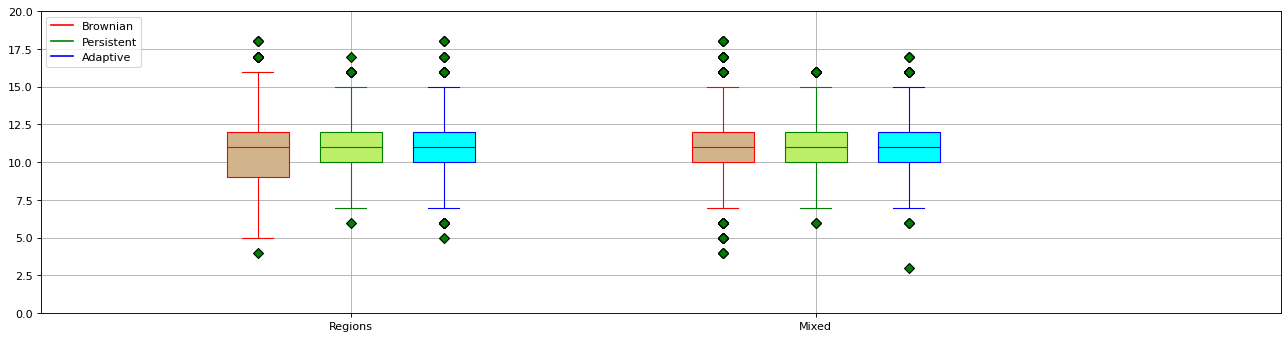

In [14]:
boxplot_3dict({"Regions_Brownian":elapsed_timeout_dict.pop("Regions_Brownian"), "Mixed_Brownian":elapsed_timeout_dict.pop("Mixed_Brownian")},
              {"Regions_Persistent":elapsed_timeout_dict.pop("Regions_Persistent"), "Mixed_Persistent":elapsed_timeout_dict.pop("Mixed_Persistent")},
              {"Regions_Adaptive":elapsed_timeout_dict.pop("Regions_Adaptive"), "Mixed_Adaptive":elapsed_timeout_dict.pop("Mixed_Adaptive")},
              "adaptiveTimeout_elapsedTimeout")

### Brownian

In [15]:
# brownian_dict = elapsed_timeout_dict

### Persistent

In [16]:
# persistent_dict = elapsed_timeout_dict

### Adaptive

In [17]:
# adaptive_dict = elapsed_timeout_dict

In [18]:
# boxplot_3dict(brownian_dict, persistent_dict, adaptive_dict, "elapsedTimeout_")

### Brownian

In [19]:
# saveFigure = True
# figName="elapsedTimeout_brownian_"+results_folder.split("/")[-1]
# print(figName)
# simple_boxplot(elapsed_timeout_dict, figName, saveFigure)

### Persistent

In [20]:
# saveFigure = True
# figName="elapsedTimeout_persistent_"+results_folder.split("/")[-1]
# print(figName)
# simple_boxplot(elapsed_timeout_dict, figName, saveFigure)

## Adaptive

In [21]:
# saveFigure = True
# figName="elapsedTimeout_adaptive_"+results_folder.split("/")[-1]
# print(figName)
# simple_boxplot(elapsed_timeout_dict, figName, saveFigure)